In [1]:
# AW 7/10/2025
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import time as time
from collections import Counter,defaultdict
from sklearn.decomposition import PCA

df = pd.read_csv(".//ieee-fraud-detection//train_transaction.csv")
# setting df to be the features only
df = df.iloc[:,17:]

In [2]:
# M4 column has weird values [M0,M1,M2],replacing with [0,1,2]
# The remaining M1-M9 columns have T/F values replacing with 1/0
# define a dictionary as a mapping function
replace_mapping = {'F':0,'T':1,'M0':0,'M1':1,'M2':2}
# replace each column with replaced values
for i in range(9):
    df['M'+str(i+1)] = df['M'+str(i+1)].map(replace_mapping)

# checking that everything is a float
# nothing should print
for i in df:
    if df[i].dtypes!=np.float64:
        print(i)

In [ ]:
# calculates correlation matrix (despite the NaNs)
# takes almost 2 mins
bigcorr = df.corr()

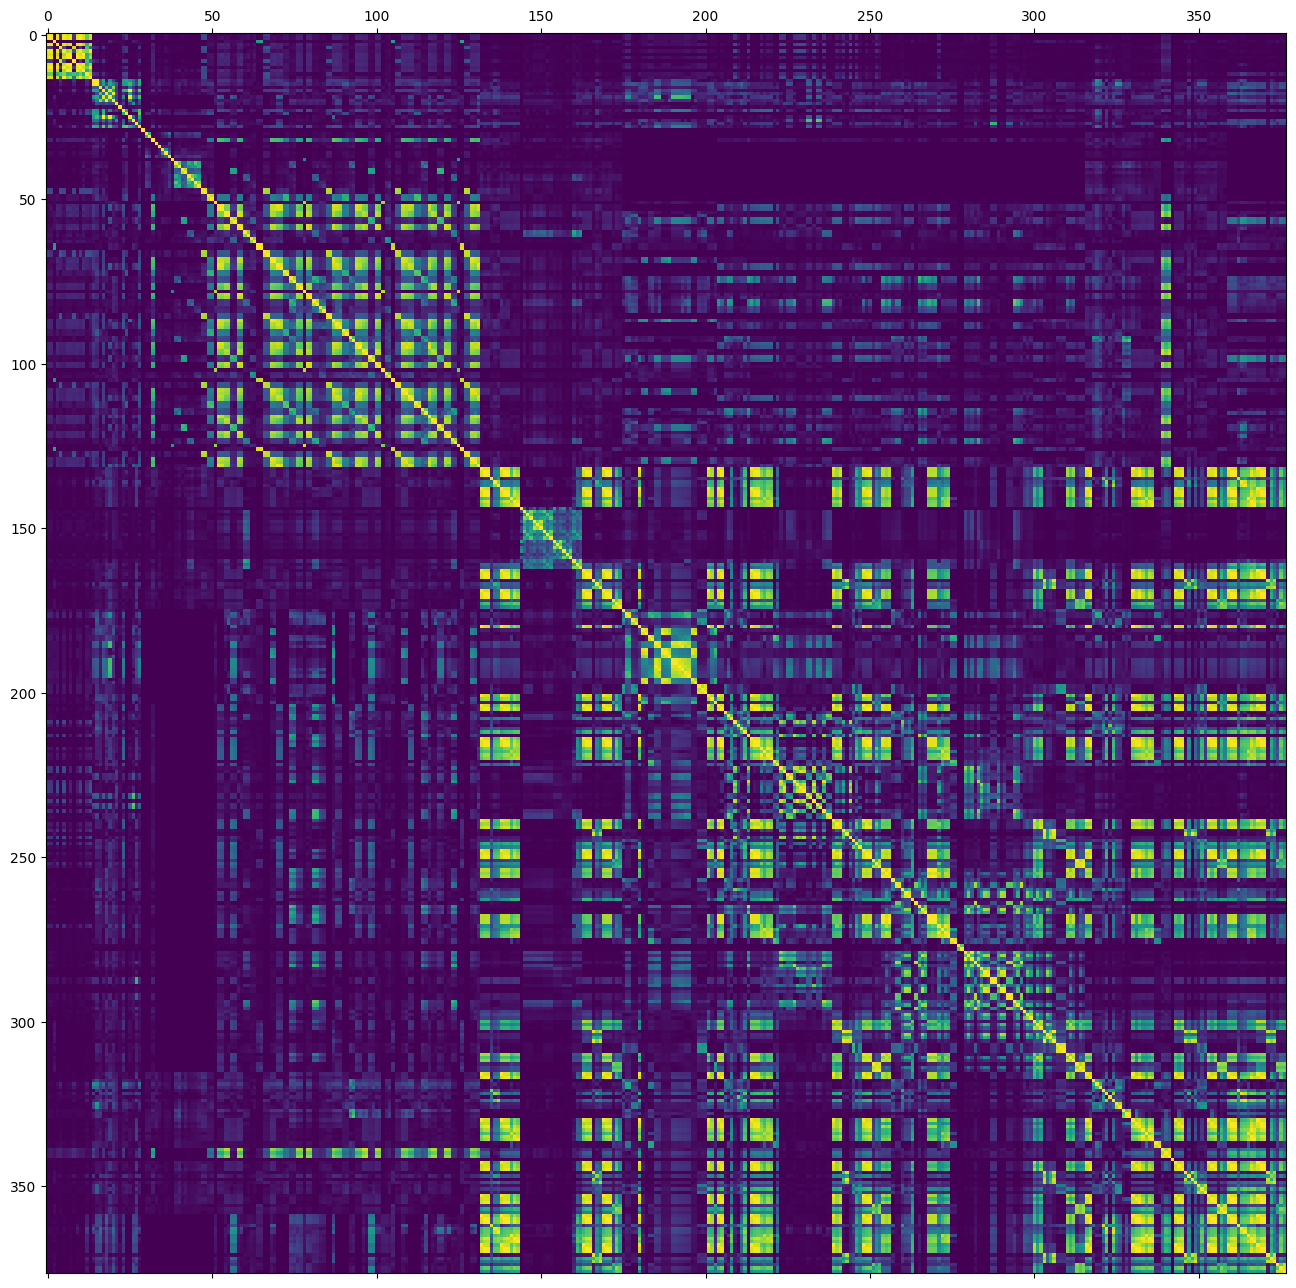

In [4]:
plt.rcParams['figure.figsize'] = [25,25]
# filling in the NaNs AFTER calculations
# absolute values to show magnitude of correlations
plt.matshow(np.abs(bigcorr.fillna(0)))

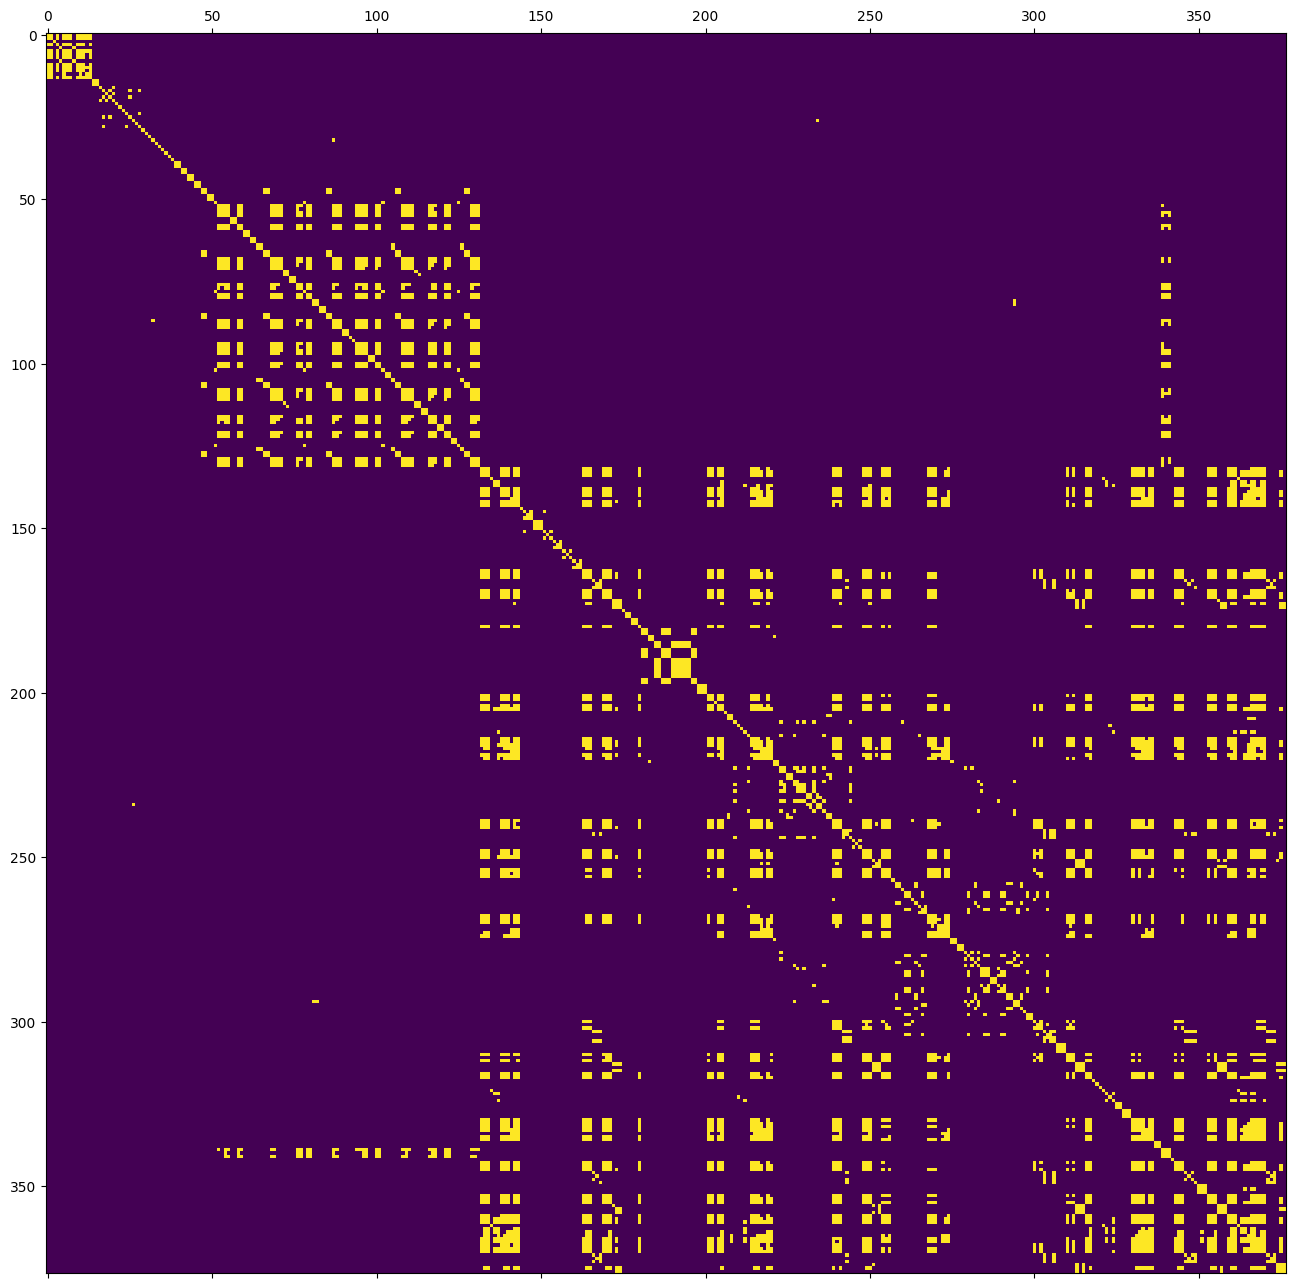

In [28]:
# threshold set at 0.74 (based on results at the bottom of the notebook)
threshold = 0.74 # NOTE: determined below
plt.rcParams['figure.figsize'] = [25,25]
# same figure but only showing correlations above threshold
plt.matshow(np.abs(bigcorr.fillna(0))>threshold)

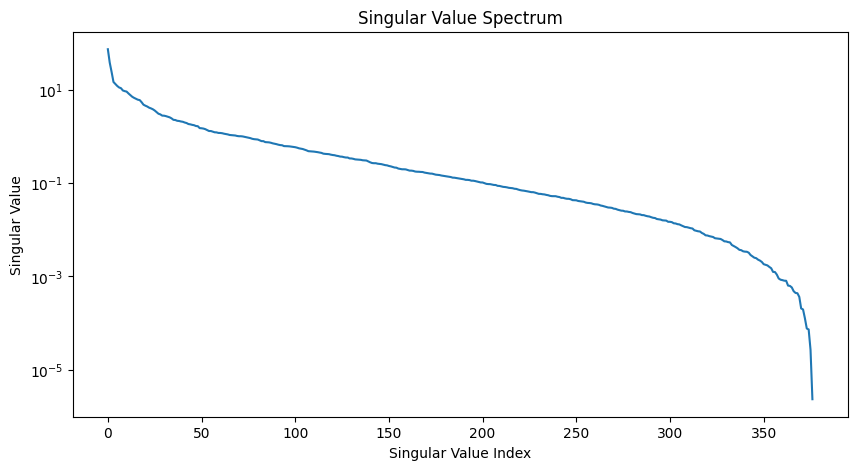

In [15]:
plt.rcParams['figure.figsize'] = [10, 5]
U,S,VT =np.linalg.svd(bigcorr.fillna(0))
for i in range(len(VT)):
    VT[i] = np.abs(VT[i])/max(np.abs(VT[i]))
plt.semilogy(S)
plt.title('Singular Value Spectrum')
plt.xlabel('Singular Value Index')
plt.ylabel('Singular Value')
plt.show()

In [34]:
remaining_labels = set(bigcorr.columns)
indep_grouping = []
# for i in range(len(VT)):
i = 0
while i<len(bigcorr.columns):
    # intersection of sets
    to_append = list(set(bigcorr.columns[VT[i]>threshold]) & remaining_labels)
    # sort according to original order
    to_append = sorted(to_append, key=lambda x: {value: index for index, value in enumerate(bigcorr.columns)}[x])
    if len(to_append)>0:
        indep_grouping.append(to_append)
        # remove from the main set
        remaining_labels = remaining_labels-set(indep_grouping[-1])
        print(f'Group {len(indep_grouping):1d}, Features in Group: {len(to_append):1d} ')
        print(to_append)
    i+=1

print(f'Total number of groups: {len(indep_grouping)}')

Group 1, Features in Group: 74 
['V95', 'V96', 'V97', 'V101', 'V102', 'V103', 'V104', 'V105', 'V106', 'V126', 'V127', 'V128', 'V132', 'V133', 'V134', 'V143', 'V164', 'V165', 'V167', 'V168', 'V175', 'V177', 'V178', 'V179', 'V180', 'V181', 'V182', 'V183', 'V202', 'V203', 'V204', 'V211', 'V212', 'V213', 'V217', 'V218', 'V219', 'V231', 'V232', 'V233', 'V236', 'V237', 'V263', 'V265', 'V273', 'V274', 'V275', 'V279', 'V280', 'V293', 'V294', 'V295', 'V296', 'V297', 'V298', 'V299', 'V306', 'V307', 'V308', 'V316', 'V317', 'V318', 'V322', 'V323', 'V324', 'V326', 'V327', 'V328', 'V329', 'V330', 'V331', 'V332', 'V333', 'V338']
Group 2, Features in Group: 38 
['V15', 'V16', 'V17', 'V18', 'V21', 'V22', 'V31', 'V32', 'V33', 'V34', 'V39', 'V40', 'V42', 'V43', 'V50', 'V51', 'V52', 'V57', 'V58', 'V59', 'V60', 'V63', 'V64', 'V71', 'V72', 'V73', 'V74', 'V79', 'V80', 'V81', 'V84', 'V85', 'V92', 'V93', 'V94', 'V302', 'V303', 'V304']
Group 3, Features in Group: 23 
['V148', 'V149', 'V155', 'V156', 'V157', 'V1

Features Kept: 60


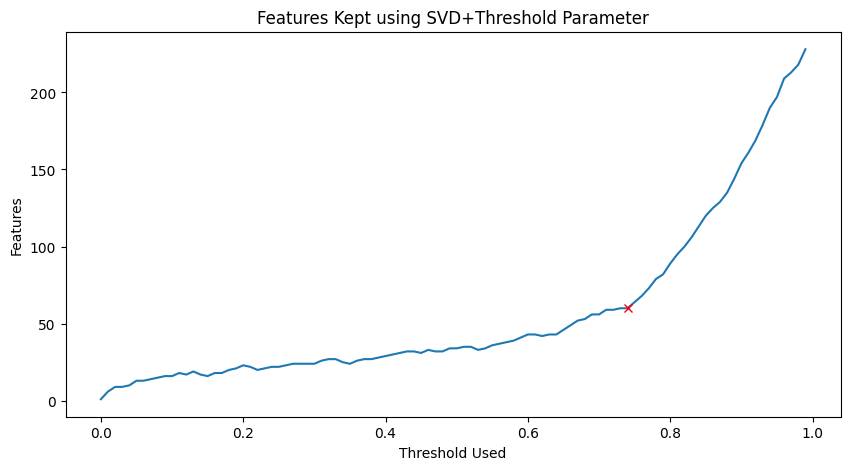

In [25]:
# performing a parameter sweep across thresholds
thresholds = np.linspace(0,0.99,100)
results = np.zeros(100)

for j in range(len(thresholds)):
    remaining_labels = set(bigcorr.columns)
    indep_grouping = []
    # for i in range(len(VT)):
    i = 0
    while len(remaining_labels)>0 and i<len(bigcorr.columns):
        to_append = list(set(bigcorr.columns[VT[i]>thresholds[j]]) & remaining_labels)
        if len(to_append)>0:
            indep_grouping.append(to_append)
            remaining_labels = remaining_labels-set(indep_grouping[-1])
        i+=1
    results[j] = len(indep_grouping)

# threshold set at 0.74 since slope starts to grow faster beyond that
idx = 74
plt.rcParams['figure.figsize'] = [10, 5]
plt.plot(thresholds,results)
plt.plot(thresholds[idx],results[idx],'xr')
plt.xlabel('Threshold Used')
plt.ylabel('Features')
plt.title('Features Kept using SVD+Threshold Parameter')

print('Features Kept:',int(results[idx]))

In [36]:
print(f'Total Number of Groups: {len(indep_grouping)}')
print('Single Member Groups:')
for i in indep_grouping:
    if len(i)==1:
        print(i)

Total Number of Groups: 60
Single Member Groups:
['V314']
['V3']
['D5']
['V325']
['D10']
['D14']
['V121']
['V220']
['M7']
['D8']
['V1']
['D9']
['M1']
['V305']
['D3']
['V284']
['V310']
['V130']
['V173']
['V262']
['V225']
['V321']
['V320']
['V136']
['V339']
